In [1]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [6]:
import pandas as pd
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1pE93KG9RvpzjNtobDr7z0nIdilLOyTi9bab4HfEkxII/edit?usp=sharing')
sheet = wb.worksheet('Sheet1')
# Now that we have the tab specified it’s time to get the data. To do this we will just call the get_all_values() function off of the sheet object we created above:
data = sheet.get_all_values()

df = pd.DataFrame(data[1:])
df.columns = data[0]

In [10]:
df['Red'] = df['Red'].astype('float32')
df['Green'] = df['Green'].astype('float32')
df['Blue'] = df['Blue'].astype('float32')
df['Is this Purple?'] = df['Is this Purple?'].astype('category')
df['Contributor'] = df['Contributor'].astype('category')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Red              61 non-null     float32 
 1   Green            61 non-null     float32 
 2   Blue             61 non-null     float32 
 3   Is this Purple?  61 non-null     category
 4   Contributor      61 non-null     category
dtypes: category(2), float32(3)
memory usage: 1.8 KB
None
     Red  Green   Blue Is this Purple? Contributor
0  133.0   40.0  202.0             Yes     Prahlad
1   30.0  164.0  150.0              No        Alok
2  142.0   29.0  159.0             Yes        Alok
3  164.0  115.0   30.0              No        Alok
4   72.0   72.0   14.0              No        Alok


In [13]:
df['Is this Purple?'][df['Is this Purple?']=='yes'] = 'Yes'
df['Is this Purple?'] = df['Is this Purple?'].astype('str')
df['Is this Purple?'] = df['Is this Purple?'].astype('category')
df['Is this Purple?'].value_counts()

No     37
Yes    24
Name: Is this Purple?, dtype: int64

In [16]:
df['Contributor'].str.lower().value_counts()

hannah       7
zora         7
shlok        5
daniel       5
alex         5
rahul        5
alok         5
veda         5
larry        5
katherine    5
theo         5
prahlad      1
claire       1
Name: Contributor, dtype: int64

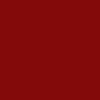

In [19]:
from colorsys import hsv_to_rgb
from PIL import Image


colors = []

inputColor = [131,	10 , 10]
for hue in range(100):
    for sat in range(100):
        # Convert color from HSV to RGB
        # rgb = hsv_to_rgb(hue/360, sat/100, 1)
        rgb = [inputColor[0], inputColor[1], inputColor[2]]
        colors.extend(rgb)

im = Image.frombytes("RGB", (100, 100), bytes(colors))
im

In [20]:
!pip install dtale

     |████████████████████████████████| 14.4 MB 112 kB/s 
     |████████████████████████████████| 1.1 MB 39.2 MB/s 
     |████████████████████████████████| 642 kB 35.4 MB/s 
     |████████████████████████████████| 45 kB 3.8 MB/s 
     |████████████████████████████████| 191 kB 72.2 MB/s 
     |████████████████████████████████| 20.6 MB 1.3 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 1.8 MB 45.1 MB/s 
     |████████████████████████████████| 47 kB 4.8 MB/s 
     |████████████████████████████████| 79.9 MB 101 kB/s 
     |████████████████████████████████| 3.7 MB 75.0 MB/s 
     |████████████████████████████████| 83 kB 2.3 MB/s 
     |████████████████████████████████| 1.8 MB 50.7 MB/s 
     |████████████████████████████████| 357 kB 72.4 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=db5821cf47eb9e9c44293be8e7584d6448139167b401ac65051e2baae9caaa34
  Stored in directory: /root/.cache/pip/wheels/

In [21]:
!pip install dtreeviz

     |████████████████████████████████| 60 kB 7.0 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66636 sha256=f96ef402282db01abe52c4afe7dbacc7d6c2cccad5bad590bb52aa5236efb369
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz


In [28]:
import pandas as pd

import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

dtale.show(df, ignore_duplicate=True) #the link to DTALE

2021-07-20 19:50:02,230 - INFO     - NumExpr defaulting to 2 threads.


https://rq3a8rf5k5h-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['Contributor'])]['Contributor']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Contributor Value Counts'},
    'xaxis': {'title': {'text': 'Contributor'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

# from plotly.offline import iplot, init_notebook_mode

# init_notebook_mode(connected=True)
# for chart in charts:
#     chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(figure)
# figure

# Build a decision tree

0    37
1    24
Name: Is this Purple?, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



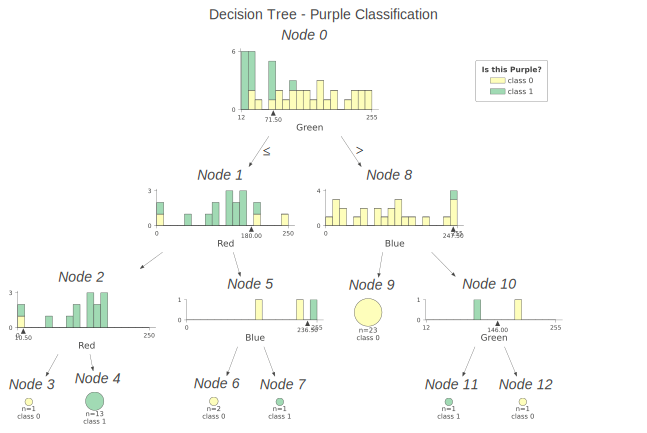

In [43]:
# !pip install dtreeviz
import matplotlib.pyplot as plt
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn import tree

from io import StringIO
from ipywidgets import Image
from dtreeviz.trees import *

# prepare the data
X=df.drop(['Is this Purple?', 'Contributor'],axis=1)

from sklearn.preprocessing import LabelEncoder
cols = ['Is this Purple?']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

print(df['Is this Purple?'].value_counts())

y=df['Is this Purple?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fir the regressor
reg = tree.DecisionTreeClassifier(max_depth=50, random_state=42)
reg.fit(X_train, y_train)

# plot the tree
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='Is this Purple?',
               feature_names=X.columns.to_list(),
               title="Decision Tree - Purple Classification", 
               show_node_labels = True)
viz

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0],
       [ 5,  4]])

In [46]:
import pickle
filepath=r'PurpleRGB_model.pckl'
saved_model=pickle.dump(reg,open(filepath,'wb'))

In [49]:
df.to_csv("PurpleData.csv", index=False)

# Exploratory Analysis in R, using Colab

In [47]:
%load_ext rpy2.ipython

In [50]:
%%R
myData <- read.csv('/content/PurpleData.csv', header = TRUE)
head(myData)

  Red Green Blue Is.this.Purple. Contributor
1 133    40  202               1     Prahlad
2  30   164  150               0        Alok
3 142    29  159               1        Alok
4 164   115   30               0        Alok
5  72    72   14               0        Alok
6  47    90  146               0        Alok


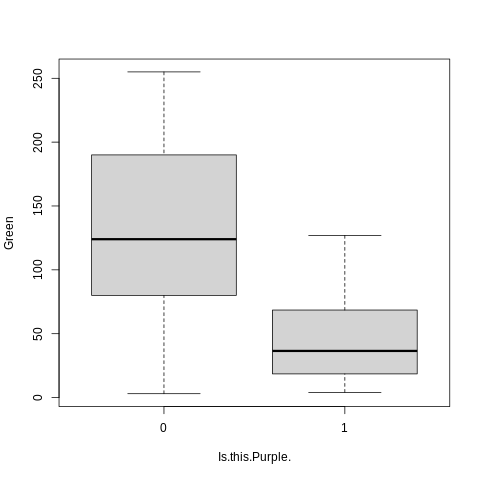

In [55]:
%%R
boxplot(Green ~ Is.this.Purple., data = myData)

# Create a streamlit app to classify the purple color

In [56]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2021-07-20 20:44:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.212.203.64, 34.195.15.150, 3.210.84.123, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.212.203.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  26.2MB/s    in 0.5s    

2021-07-20 20:44:48 (26.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [73]:
get_ipython().system_raw('./ngrok http 8501 &')


In [74]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Execute the next cell and the go to the following URL: https://5b05b1f3030a.ngrok.io


In [71]:
type(im)

PIL.Image.Image

In [72]:
%%writefile streamlitApp.py

import streamlit as st

import pickle

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base64
import pathlib

from colorsys import hsv_to_rgb
from PIL import Image


def main():
    page = st.sidebar.selectbox("Purple Color Classifier", [ "Test", "Train"])
    # R = st.sidebar.text_area("Enter the Red Component as an 8bit integer: ", 100)
    # G = st.sidebar.text_area("Enter the Green Component as an 8bit integer: ", 10)
    # B = st.sidebar.text_area("Enter the Blue Component as an 8bit integer: ", 10)

    R = st.sidebar.slider("Enter the Red Component as an 8bit integer", 0, 255, 100)
    G = st.sidebar.slider("Enter the Green Component as an 8bit integer", 0, 255, 10)
    B = st.sidebar.slider("Enter the Blue Component as an 8bit integer", 0, 255, 10)
        
    if page == "Test":
        st.header("Predicted Purple? ")

        reloadedModel = pickle.load(open('/content/PurpleRGB_model.pckl','rb'))
        result = reloadedModel.predict([[float(R), float(G),  float(B)]])

        if (result == 1): 
          st.write("Yes!")
        else:
          st.write("No")

          
        colors = []

        inputColor = [R, G, B]
        for hue in range(100):
            for sat in range(100):
                # Convert color from HSV to RGB
                # rgb = hsv_to_rgb(hue/360, sat/100, 1)
                rgb = [inputColor[0], inputColor[1], inputColor[2]]
                colors.extend(rgb)

        im = Image.frombytes("RGB", (100, 100), bytes(colors))
        st.image(im)

    elif page == "Train":
        st.header("Refit the model against new data: ")

# @st.cache
# @st.cache(allow_output_mutation=True)
# @st.cache(suppress_st_warning=True)


if __name__ == "__main__":
    main()


Overwriting streamlitApp.py


In [ ]:
!pip install streamlit

In [75]:
!streamlit run /content/streamlitApp.py 


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.85.21:8501

Executing shutdown due to inactivity...


2021-07-20 21:03:26,797 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-07-20 21:03:26,815 - INFO     - Executing shutdown...


  Stopping...


# Build H2o Model

In [81]:
!wget -c http://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/h2o-3.30.0.1.zip
!unzip -n h2o-3.30.0.1.zip
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
n

--2021-07-20 21:06:24--  http://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/h2o-3.30.0.1.zip
Resolving h2o-release.s3.amazonaws.com (h2o-release.s3.amazonaws.com)... 52.216.17.88
Connecting to h2o-release.s3.amazonaws.com (h2o-release.s3.amazonaws.com)|52.216.17.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389688207 (372M) [application/zip]
Saving to: ‘h2o-3.30.0.1.zip’

h2o-3.30.0.1.zip    100%[===================>] 371.63M  33.9MB/s    in 9.7s    

2021-07-20 21:06:34 (38.4 MB/s) - ‘h2o-3.30.0.1.zip’ saved [389688207/389688207]

Archive:  h2o-3.30.0.1.zip
   creating: h2o-3.30.0.1/
  inflating: h2o-3.30.0.1/h2o.jar    
   creating: h2o-3.30.0.1/bindings/
   creating: h2o-3.30.0.1/bindings/java/
 extracting: h2o-3.30.0.1/bindings/java/h2o-bindings-3.30.0.zip  
   creating: h2o-3.30.0.1/python/
  inflating: h2o-3.30.0.1/python/h2o-3.30.0.1-py2.py3-none-any.whl  
  inflating: h2o-3.30.0.1/python/h2o_client-3.30.0.1-py2.py3-none-any.whl  
  inflating: 

In [82]:
get_ipython().system_raw('./ngrok http 54321 &')


In [83]:
get_ipython().system_raw('java -jar h2o-3.30.0.1/h2o.jar &')


In [84]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Execute the next cell and the go to the following URL: http://d434636ce393.ngrok.io


In [79]:
!pip install https://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/Python/h2o-3.30.0.1-py2.py3-none-any.whl


     |████████████████████████████████| 129.6 MB 21 kB/s 


In [85]:
import h2o
import pandas as pd
h2o.init(port = 54321, ip = "localhost", bind_to_localhost = False, max_mem_size='8G')
h2o.remove_all()

h2odf = h2o.H2OFrame(df,  destination_frame="myData_7202021.hex")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,"1 year, 3 months and 17 days !!!"
H2O_cluster_name:,H2O_from_python_unknownUser_ek12cg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8.000 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [86]:
myBestModel = h2o.load_model("/content/myModels/StackedEnsemble_AllModels_AutoML_20210720_211141")

In [89]:
ModelPredictionsH2o = myBestModel.predict(h2odf)
ModelPredictionsDF = ModelPredictionsH2o.as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%


In [90]:
pd.crosstab(df['Is this Purple?'],ModelPredictionsDF.predict)

predict,0,1
Is this Purple?,,
0,35,2
1,0,24
